In [9]:
import numpy as np 
import pandas as pd 
import time
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from gensim.models import Doc2Vec, doc2vec
from nltk.corpus import stopwords
from nltk.stem.porter import *
from textblob import TextBlob, Word
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, SGDClassifier
from nltk import tokenize
import matplotlib as mpl

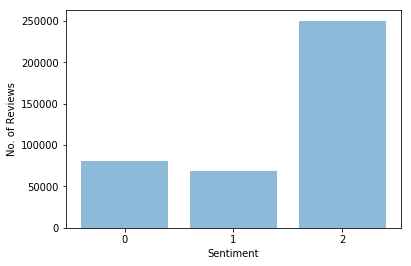

In [10]:
df = pd.read_csv("train.csv", dtype={"label": int, "text": str})
p = df.groupby("label").count()

plt.figure(0)
plt.bar(p.index, p.text, alpha=0.5)
plt.xticks(p.index)
plt.xlabel("Sentiment")
plt.ylabel("No. of Reviews")
plt.show()

In [11]:
y = df.label
text = df.text

tick = time.time()

#Convert all text to lower case
text = text.apply(lambda x: " ".join(x.lower() for x in str(x).split()))

#Remove all punctuation
for i in range(0, len(text)):
    text[i] = re.sub(r'[^\w\s]', "", text[i])

#Remove stop words (removes important words! needs modification)
stop = stopwords.words("english")
stop = stop[:143]
stop.remove("not")
stop.remove("against")
stop.remove("no")
stop.append("food")
stop.append("place")
stop.append("service")
text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))

#Stemming
stemmer = PorterStemmer()
text = text.apply(lambda x: " ".join(stemmer.stem(x) for x in str(x).split()))

#seperating words into lists
for i, line in enumerate(text):
  text[i] = line.split()

df.text = text
text = list(text)
print(time.time() - tick)
df.to_csv("out.csv", sep=",")
df

682.8966610431671


,label,text
0,1,"[great, mobil, app, nice, reward, program, mak..."
1,2,"[realli, fast, polit, definit, recommend, also..."
2,2,"[alway, amaz, friendli, staff, great, deal, pr..."
3,1,"[wine, 101, class, friday, night, cool, spot, ..."
4,1,"[round, think, may, potenti, coupl, thing, tri..."
5,0,"[romant, tryst, planet, hollywood, poker, room..."
6,2,"[got, color, haircut, final, month, look, righ..."
7,0,"[never, go, nearli, empti, 430, pm, sat, way, ..."
8,2,"[ive, come, 2, year, np, bought, staff, alway,..."
9,0,"[07082014, war, ich, mit, 5, kollegen, mittag,..."


In [12]:
df =  pd.read_csv("out.csv")
df

,Unnamed: 0,label,text
0,0,1,"['great', 'mobil', 'app', 'nice', 'reward', 'p..."
1,1,2,"['realli', 'fast', 'polit', 'definit', 'recomm..."
2,2,2,"['alway', 'amaz', 'friendli', 'staff', 'great'..."
3,3,1,"['wine', '101', 'class', 'friday', 'night', 'c..."
4,4,1,"['round', 'think', 'may', 'potenti', 'coupl', ..."
5,5,0,"['romant', 'tryst', 'planet', 'hollywood', 'po..."
6,6,2,"['got', 'color', 'haircut', 'final', 'month', ..."
7,7,0,"['never', 'go', 'nearli', 'empti', '430', 'pm'..."
8,8,2,"['ive', 'come', '2', 'year', 'np', 'bought', '..."
9,9,0,"['07082014', 'war', 'ich', 'mit', '5', 'kolleg..."


In [57]:
X = df.text.values
Y = df.label.values

In [31]:
vectorizer = CountVectorizer().fit(X)
X = vectorizer.transform(X)

In [32]:
print(X.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

(400001, 247130)


## Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
prediction = nb.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc = []
print(confusion_matrix(y_test, prediction))
print()
print(classification_report(y_test, prediction))
acc.append(accuracy_score(y_test, prediction))
print("Accuracy:",accuracy_score(y_test, prediction))

[[21031  1715  1469]
 [ 2285 12801  5327]
 [  809  2243 72321]]

             precision    recall  f1-score   support

          0       0.87      0.87      0.87     24215
          1       0.76      0.63      0.69     20413
          2       0.91      0.96      0.94     75373

avg / total       0.88      0.88      0.88    120001

Accuracy: 0.8846009616586529


In [51]:
positive_review = ["ok", "hit", "miss", "decent"]
transformed_review  = vectorizer.transform(positive_review)

nb.predict(transformed_review)[0]

1

## Logistic Regression

In [33]:
lr = LogisticRegression()

In [34]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
from sklearn.metrics import accuracy_score, classification_report
prediction = lr.predict(x_test)
print(classification_report(y_test, prediction))
acc.append(accuracy_score(y_test, prediction))
print("Accuracy:",accuracy_score(y_test, prediction))

             precision    recall  f1-score   support

          0       0.87      0.87      0.87     24215
          1       0.76      0.63      0.69     20413
          2       0.91      0.96      0.94     75373

avg / total       0.88      0.88      0.88    120001

Accuracy: 0.8846009616586529


## SGD Classifier

In [37]:
sgd = SGDClassifier()
x_train.shape
y_train.shape
sgd.fit(x_train, y_train)

C:\Users\ishaanverma\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [53]:
predictions = sgd.predict(x_test)
acc.append(accuracy_score(y_test, predictions))
print(accuracy_score(y_test, predictions))
acc

0.8815676536028867


[0.8846009616586529, 0.8846009616586529, 0.8815676536028867]

<Container object of 3 artists>

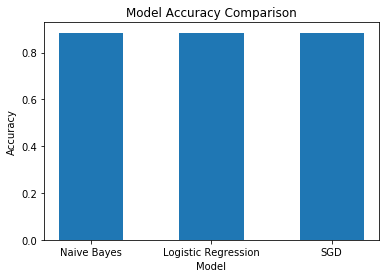

In [56]:
plt.figure(1)
x = [0, 1.5, 3]


xt = ["Naive Bayes", "Logistic Regression", "SGD"]
plt.title("Model Accuracy Comparison")
plt.xticks(x, xt)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.bar(x,acc)